DATASET DOWNLOAD AND EXTRACT

In [1]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
from utility import plot_confusion_matrix
import tensorflow.keras.layers as layer
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [2]:
seed = 1231829
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
from data_loader import get_data
X_data, labels = get_data()

/Users/denisderonjic/Repos/ActivityRecognition/data_loader.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return (np.array(X_data), labels)


In [4]:
print(X_data.shape)
print(labels.shape)

(761,)
(761,)


FALLING


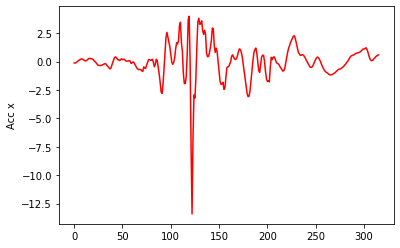

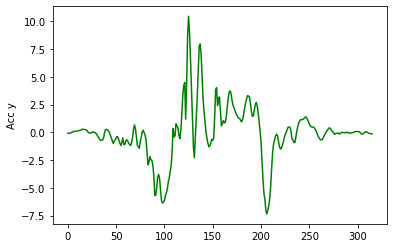

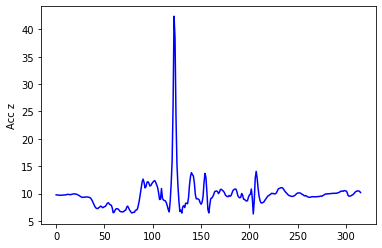

In [5]:
import matplotlib.pyplot as plt

measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [6]:
from data_transformation import frame_data

X_data, y_data = frame_data(X_data, labels)

In [7]:
X_data = X_data[:,:, :6] #Dropping magnetometer

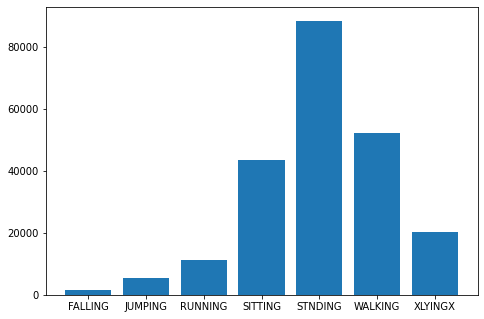

In [8]:
unique, counts = np.unique(y_data, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique,counts)
plt.show()

FALLING


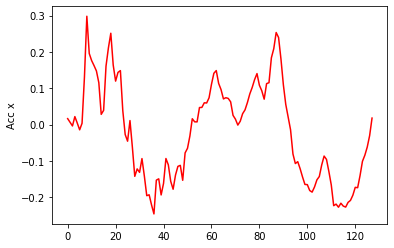

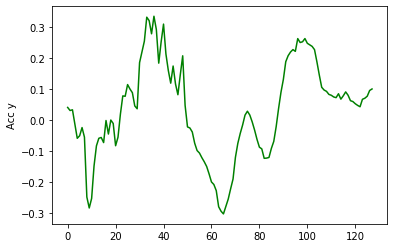

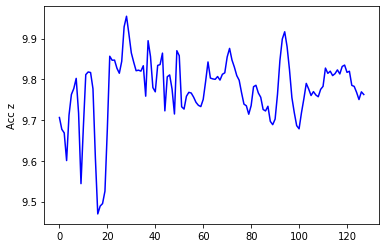

In [9]:
measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [10]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

y_data = le.fit_transform(y_data)

In [11]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

num_labels = len(le_name_mapping)
print(num_labels)

{'FALLING': 0, 'JUMPING': 1, 'RUNNING': 2, 'SITTING': 3, 'STNDING': 4, 'WALKING': 5, 'XLYINGX': 6}
7


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

stratifiedSplit = True

if stratifiedSplit:
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=seed)
    for train_index, test_index in split.split(X_data, y_data):
        X_train.append(X_data[train_index])
        y_train.append(y_data[train_index])
        X_test.append(X_data[test_index])
        y_test.append(y_data[test_index])
    X_train = np.array(X_train[0])
    y_train = np.array(y_train[0])
    X_test = np.array(X_test[0])
    y_test = np.array(y_test[0])
else:
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=seed)
    

In [13]:
import data_transformation as dt

#X_train, y_train = data_augmentation2(X_train, y_train, [dt.window_warp, dt.window_slice], for_labels=[0])
#X_train, y_train = data_augmentation2(X_train, y_train, [dt.window_warp, dt.window_slice], for_labels=[6])

In [14]:
#check https://stackoverflow.com/questions/59979763/cant-get-done-conv1d-with-tf-keras
#check https://stats.stackexchange.com/questions/264546/difference-between-samples-time-steps-and-features-in-neural-network
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


In [15]:
#fig, axs = plt.subplots(3, 2)
#fig.set_figheight(15)
#fig.set_figwidth(15)
#axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
#axs[0, 0].set_title('Real Acc x')
#axs[0, 1].plot(X_prova[measure,:,0], 'tab:red')
#axs[0, 1].set_title('Pred Acc x')
#
#axs[1, 0].plot(X_train[measure,:,1], 'tab:green')
#axs[1, 0].set_title('Real Acc y')
#axs[1, 1].plot(X_prova[measure,:,1], 'tab:green')
#axs[1, 1].set_title('Pred Acc y')
#
#axs[2, 0].plot(X_train[measure,:,2], 'tab:blue')
#axs[2, 0].set_title('Real Acc 1')
#axs[2, 1].plot(X_prova[measure,:,2], 'tab:blue')
#axs[2, 1].set_title('Pred Acc 1')

In [16]:
#X_train_norm = np.linalg.norm(X_train[:,:,0:3], axis=2, keepdims=True)
#X_test_norm = np.linalg.norm(X_test[:,:,0:3], axis=2, keepdims=True)
#X_train = np.concatenate([X_train, X_train_norm], axis=2)
#X_test = np.concatenate([X_test, X_test_norm], axis=2)

In [17]:
print(X_train.shape)

(155666, 128, 6)


In [18]:
from data_transformation import data_normalizaion

X_train = data_normalizaion(X_train)
X_test = data_normalizaion(X_test)

2021-08-19 11:29:54.459659: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-19 11:29:54.460050: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


# Classification NN

In [19]:
from models import ConvolutionalClassificationNNWithRNN
  

model = ConvolutionalClassificationNNWithRNN(num_labels)

model_test_data = X_train[0:10, :, :]
x = model(model_test_data)
print(x.shape)

(10, 7)


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (10, 128, 256)            14080     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (10, 64, 256)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (10, 64, 128)             229504    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (10, 32, 128)             0         
_________________________________________________________________
gru (GRU)                    (10, 32, 40)              20400     
_________________________________________________________________
conv1d_2 (Conv1D)            (10, 32, 64)              12864     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (10, 16, 64)              0

In [21]:
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


In [22]:
from sklearn.utils import class_weight

class_weights_list = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights = {}
for i in range(num_labels):
  w = class_weights_list[i]
  class_weights[i] = w
print(class_weights)

{0: 22.193612774451097, 1: 5.707905544147844, 2: 2.8631389210763487, 3: 0.7321634346294407, 4: 0.3592974972937166, 5: 0.6094105395851032, 6: 1.5612187587756248}


/Users/denisderonjic/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4 5 6], y=[4 5 5 ... 4 4 4] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [23]:
#from focal_loss import SparseCategoricalFocalLoss

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
#loss_object = SparseCategoricalFocalLoss(gamma=2.0)
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss=loss_object, metrics=['acc'])


In [24]:
callback = tf.keras.callbacks.EarlyStopping(monitor='acc', patience=5)
history = model.fit(X_train, y_train,
                epochs=10,
                shuffle=True,
                batch_size=64,
                validation_split=0.2,
                #class_weight=class_weights,
                callbacks=[callback])

Epoch 1/10
1946/1946 [==============================] - 98s 50ms/step - loss: 0.5653 - acc: 0.7777 - val_loss: 0.3505 - val_acc: 0.8705
Epoch 2/10
1946/1946 [==============================] - 97s 50ms/step - loss: 0.3031 - acc: 0.8869 - val_loss: 0.2492 - val_acc: 0.9074
Epoch 3/10
1946/1946 [==============================] - 98s 50ms/step - loss: 0.2245 - acc: 0.9171 - val_loss: 0.1981 - val_acc: 0.9281
Epoch 4/10
1946/1946 [==============================] - 99s 51ms/step - loss: 0.1774 - acc: 0.9351 - val_loss: 0.1677 - val_acc: 0.9407
Epoch 5/10
1946/1946 [==============================] - 99s 51ms/step - loss: 0.1439 - acc: 0.9476 - val_loss: 0.1629 - val_acc: 0.9421
Epoch 6/10
1946/1946 [==============================] - 100s 51ms/step - loss: 0.1214 - acc: 0.9557 - val_loss: 0.1279 - val_acc: 0.9529
Epoch 7/10
1946/1946 [==============================] - 98s 50ms/step - loss: 0.1048 - acc: 0.9628 - val_loss: 0.0979 - val_acc: 0.9643
Epoch 8/10
1946/1946 [=========================

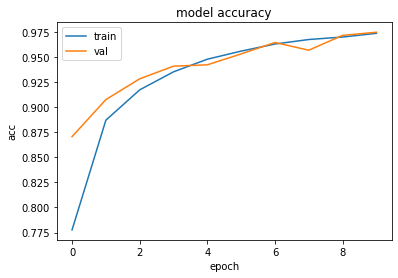

In [25]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)

2085/2085 - 18s - loss: 0.0775 - acc: 0.9719


In [27]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)


In [28]:
from sklearn.metrics import precision_score, recall_score

#None, 'micro', 'macro', 'weighted'
precisions = precision_score(y_test, y_pred, average=None)
recalls = recall_score(y_test, y_pred, average=None)
print("Precision score: ", precisions)
print("Recall score: ", recalls)

Precision score:  [0.95988539 0.90432802 0.99009307 0.94506819 0.97540301 0.99614421
 0.9636273 ]
Recall score:  [0.78088578 0.9508982  0.99068789 0.96350926 0.97172585 0.99117591
 0.95036855]


In [29]:
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": Precision " + str(precisions[i]) + " Recall " + str(recalls[i]))

FALLING: Precision 0.9598853868194842 Recall 0.7808857808857809
JUMPING: Precision 0.9043280182232346 Recall 0.9508982035928144
RUNNING: Precision 0.9900930651456019 Recall 0.9906878942625413
SITTING: Precision 0.9450681938060432 Recall 0.9635092571252977
STNDING: Precision 0.9754030121849694 Recall 0.9717258538792128
WALKING: Precision 0.9961442066705225 Recall 0.9911759063878764
XLYINGX: Precision 0.9636273044344793 Recall 0.9503685503685504


In [30]:
from sklearn.metrics import f1_score

f1_scores = f1_score(y_test, y_pred, average=None)
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": F1-score " + str(f1_scores[i]))

FALLING: F1-score 0.8611825192802057
JUMPING: F1-score 0.9270286047869235
RUNNING: F1-score 0.9903903903903903
SITTING: F1-score 0.954199634814364
STNDING: F1-score 0.973560960870222
WALKING: F1-score 0.9936538461538461
XLYINGX: F1-score 0.9569520039584365


In [31]:
import matplotlib.cm

def plot_confusion_matrix(predictions, labels, target_names):

  '''
  ============================
  Internal function definition
  ============================
  '''
  def _confusion_matrix(cm,
                            target_names,
                            title='Confusion matrix',
                            cmap=None):
      import itertools

      accuracy = np.trace(cm) / float(np.sum(cm))
      misclass = 1 - accuracy

      if cmap is None:
          cmap = plt.get_cmap('Reds')
      
      cm = cm.astype('float')
      for i in range(len(cm)):
        cm[i] /= float(np.sum(cm[i]))

      plt.figure(figsize=(16, 12))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()

      if target_names is not None:
          tick_marks = np.arange(len(target_names))
          plt.xticks(tick_marks, target_names, rotation=45)
          plt.yticks(tick_marks, target_names)


      thresh = cm.max() / 2
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                      horizontalalignment="center",
                      color="white" if cm[i, j] > thresh else "black")
              


      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
      plt.show()
  '''
  ===================================
  End of internal function definition
  ===================================
  '''

  from sklearn.metrics import confusion_matrix

  conf_mat = confusion_matrix(predictions, labels)
  _confusion_matrix(conf_mat, target_names=target_names)

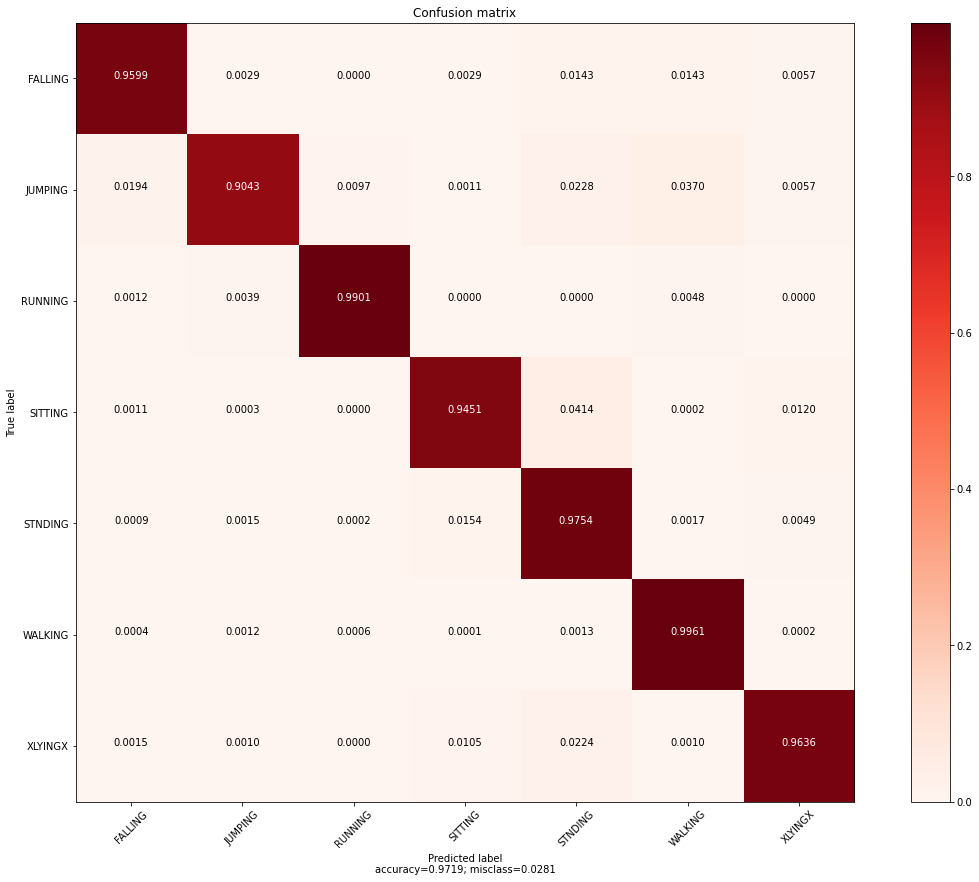

In [32]:
plot_confusion_matrix(y_pred, y_test, target_names=le.classes_)

In [35]:
model.save("models/best_CNN_GRU_model.h5")